#  Curso de Introducción a la Inteligencia Artificial y los algoritmos


---


*Red neuronal con Python*

Utilizamos Google Colab, un entorno de desarrollo desarrollado por Google, para crear libretas con extensión .ipynb. Un archivo IPYNB es un documento de cuaderno utilizado por Jupyter Notebook, un entorno computacional interactivo diseñado para asistir a científicos en su trabajo con el lenguaje Python y sus datos.

Esta es una sencilla red neuronal. En muchos países se mide la temperatura en grados Celsius. Hay otros países que utilizan los grados Fahrenheit.
La fórmula que los relaciona es :  F = C * 1,8 + 32.

Por tanto, se trata de una fórmula lineal donde tenemos un valor de X que es los grados Celsius, un valor de Y que son los grados fahrenheit, una constante que es 1,8 y un
término independiente, 32.

Es muy importante conocer los valores los conceptos de PESOS y SESGOS, que utiliza la red para ir ajustando el modelo.

In [50]:
# Importamos a nuestra libreta de trabajo las librerias a utilizar
import tensorflow as tf # libreria para IA desarrollada por google
import numpy as np # para trabajar con números
import matplotlib.pyplot as plt # se importa la libreria matplot para hacer las gráficas

## Definimos el Courpus

In [51]:
#introducimos los datos. Se crea un array, un tipo de dato estructurado que permite almacenar un conjunto de datos homogéneo
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float) #float son números reales con comas, coma flotante
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float) #np es numpy python, números en python

#estos son los ejemplos que la red usará para aprender. De momento no sabemos cual es la fórmula
print(celsius)
print(fahrenheit)

[-40. -10.   0.   8.  15.  22.  38.]
[-40.  14.  32.  46.  59.  72. 100.]


## Creamos una Capa de un Percetron
de un perceptron y de dimensión


In [52]:
# Modelo de red neuronal con una neurona.
# Utilizamos el framework Keras.
# Keras nos permite hacer las redes  neuronales más simples.
# Puedes especificar la capa de entrada y salida o especificar solo la capa de salida.

Mi_capa = tf.keras.layers.Dense(units=1, input_shape=[1])

# capas tipo densa, conecta todas las neuronas entre si aunque en este caso solo hay una neurona, units=unidades o neuronas
#input_shape estamos diciendo que se trata de una capa de entrada con una neurona

print(Mi_capa)

## Creamos el Modelo

In [53]:
#Modelo secuencial
Mi_modelo = tf.keras.Sequential([Mi_capa]) # creamos un modelo secuencial, aunque hay de varios tipos.
                                           # Le indicamos la capa que acabamos de crear
print(Mi_modelo)

## Compilamos el Modelo

In [55]:
# COMPILAMOS EL MODELO. Se prepara el modelo para ser entrenado. Se utilizan dos propiedades: optimizador y función de pérdida.
# Optimizador utilizamos el algoritmo de Adams, puedes ver que es en una búsqueda , permite a la red saber como
# ajustar PESOS y SESGOS para ir mejorando

Mi_modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), # "0.1" es la tasa de aprendizaje, si es muy pequeño los ajusta poco a poco, si es muy grande puede tardar mucho
    loss='mean_squared_error' # es la función de pérdida, que utilizamos el error cuadrático medio
)

In [56]:
# Muestra un resumen de la arquitectura del modelo
Mi_modelo.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Entrenamos la neurona para pasar de celsius a fahrenheit  



In [57]:
# ENTRENAMIENTO DEL MODELO. Se utiliza la función fit, ajuste,
print("Comenzando entrenamiento...")
Mi_historial = Mi_modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False) #epochs es las vueltas que da el algoritmo, recordamos que tenemos 7 datos, 1 vuelta serían usarlos una vez
print("Modelo entrenado!")

#tenemos que dar muchas vueltas para que optimice lo más posible, se usa el valor 1000 para revisar, aunque se puede cambiar posteriormente


Comenzando entrenamiento...
Modelo entrenado!


# Graficamos la función de pérdida

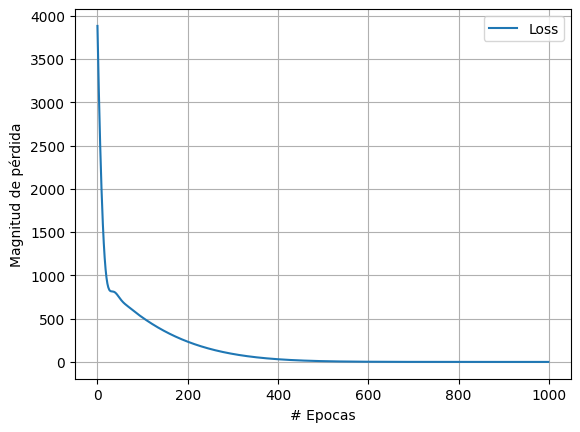

In [58]:
# RESULTADO DE LA FUNCIÓN DE PÉRDIDA. Nos informa cuan mal están los resultados en cada vuelta
plt.xlabel("# Epocas")
plt.ylabel("Magnitud de pérdida")
plt.grid()
plt.plot(Mi_historial.history["loss"], label='Loss')
plt.legend()

Como dimos mil vueltas esas mil vueltas podemos ver que conforme fue haciendo más vueltas cada vez los errores van disminuyendo en realidad por lo que podemos ver no necesitamos mil vueltas a partir de 500

# Variables internas del modelo

La fórmula que los relaciona es : F = C * 1,8 + 32,   pero no se la hemos  dado a la neurona sino que esos parámetros se corresponden con el peso y el sesgo

In [59]:
# MOSTRANDO LAS VARIABLES INTERNAS DEL MODELO, DE NUESTRA RED NEURONAL

print("Variables internas del modelo")
print(Mi_capa.get_weights()) # En el primer array el valor es de 1.7984154 (la fórmula es 1,8), sería el PESO y el segundo array es 31.89878 (el SESGO), buscábamos 32

Variables internas del modelo
[array([[1.7982316]], dtype=float32), array([31.919535], dtype=float32)]


# Predicción del modelo

In [60]:
# PREDICCIÓN DEL MODELO
print("Hagamos una predicción!")
resultado = Mi_modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 65ms/step
El resultado es [[211.7427]] fahrenheit!


Por tanto, el input fue 100, que es multiplicado por el peso 1.7984154 y después se le suma el sesgo 31.89878.

Es decir 100 * 1,7984154 + 31.89878 = **211.74**.
### La entrada ha sido 100 (Celsius) y la salida ha sido 211.74 (Fahrenheit)
La red neuronal sin haberle dicho la fórmula ha conseguido un resultado prácticamente igual al de la fórmula original.

# Cambiamos un poco el modelo de la neurona

## Agregamos mas Capas


In [61]:
# Agregamos más capas y más neuronas a la red. Agregamos 1 capa intermedia (ocultas) con 3 neuronas y hacemos el mismo proceso
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])

entrada = tf.keras.layers.Dense(units=1, input_shape=[1])
oculta = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
Mi_modelo = tf.keras.Sequential([entrada, oculta, salida])

In [62]:
Mi_modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error'
)

In [63]:
# Muestra un resumen de la arquitectura del modelo
Mi_modelo.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 3)                 6         
                                                                 
 dense_18 (Dense)            (None, 1)                 4         
                                                                 
Total params: 12 (48.00 Byte)
Trainable params: 12 (48.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
print("Comenzando entrenamiento...")
Mi_historial = Mi_modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


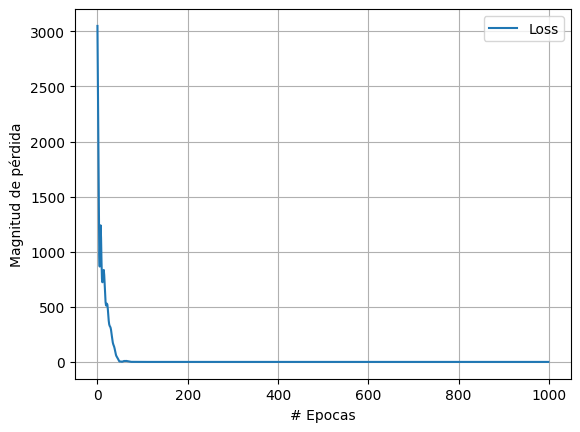

In [65]:
plt.xlabel("# Epocas")
plt.ylabel("Magnitud de pérdida")
plt.grid()
plt.plot(Mi_historial.history["loss"], label='Loss')
plt.legend()

In [66]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(entrada.get_weights())
print(oculta.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[0.6303294]], dtype=float32), array([4.7238374], dtype=float32)]
[array([[0.9476586 , 1.0770772 , 0.29319698]], dtype=float32), array([ 4.594595 ,  4.7858577, -1.9782704], dtype=float32)]
[array([[ 1.7152358 ],
       [ 1.2187723 ],
       [-0.29254463]], dtype=float32), array([4.185853], dtype=float32)]


In [67]:
print("Hagamos una predicción!")
resultado = Mi_modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
1/1 [==============================] - 0s 76ms/step
El resultado es [[211.74745]] fahrenheit!


# Buscamos la operación inversa
## Ahora la entrenamos para pasar de fahrenheit a celsius

 La fórmula que los relaciona es : F = C * 1,8 + 32   \\
 Esto es C = (F-32)/1.8      \\
 Entonces               C = F * 0.55555555555 - 17.7777777778

In [68]:
# Modelo de red neuronal con una neurona. Utilizamos el framework Keras. Keras nos permite hacer las redes  neuronales más simples. Puedes especificar las dos capas de entrada
# y salida o especificar solo la capa de salida.

Mi_capa = tf.keras.layers.Dense(units=1, input_shape=[1]) # capas tipo densa, conecta todas las neuronas entre si aunque en este caso solo hay dos neuronas, units=unidades o neuronas
#input_shape estamos diciendo que se trata de una capa de entrada con una neurona

print(Mi_capa)

#Modelo secuencial
Mi_modelo = tf.keras.Sequential([Mi_capa]) # creamos un modelo secuencial, aunque hay de varios tipos. Le indicamos la capa que acabamos de crear
print(Mi_modelo)

In [69]:
# COMPILAMOS EL MODELO. Se prepara el modelo para ser entrenado. Se utilizan dos propiedades: optimizador y función de pérdida.
# Optimizador utilizamos el algoritmo de Adams, puedes ver que es en una búsqueda , permite a la red saber como ajustar PESOS y SESGOS para ir mejorando
Mi_modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1), # "0.1" es la tasa de aprendizaje, si es muy pequeño los ajusta poco a poco, si es muy grande puede tardar mucho
    loss='mean_squared_error' # es la función de pérdida, que utilizamos el error cuadrático medio
)

In [70]:
# Muestra un resumen de la arquitectura del modelo
Mi_modelo.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
# ENTRENAMIENTO DEL MODELO. Se utiliza la función fit, ajuste,
print("Comenzando entrenamiento...")
Mi_historial = Mi_modelo.fit(fahrenheit, celsius, epochs=1000, verbose=False) #epochs es las vueltas que da el algoritmo, recordamos que tenemos 7 datos, 1 vuelta serían usarlos una vez
print("Modelo entrenado!")

#tenemos que dar muchas vueltas para que optimice lo más posible, se usa el valor 1000 para revisar, aunque se puede cambiar posteriormente


Comenzando entrenamiento...
Modelo entrenado!


# Graficamos la función de pérdida

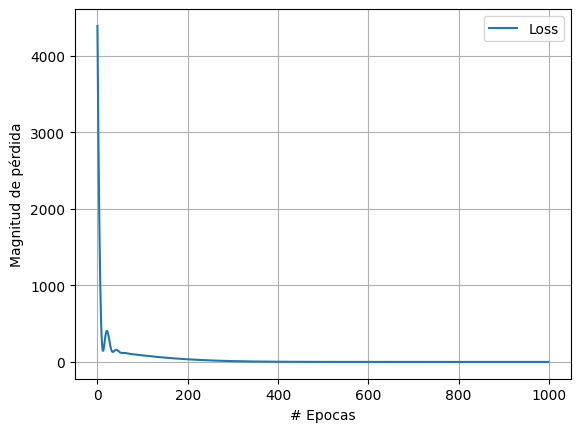

In [72]:
# RESULTADO DE LA FUNCIÓN DE PÉRDIDA. Nos informa como van dando los resultados en cada vuelta
plt.xlabel("# Epocas")
plt.ylabel("Magnitud de pérdida")
plt.grid()
plt.plot(Mi_historial.history["loss"], label='Loss')
plt.legend()


## Predecimos un valor de grados Celsius para un valor de grados Fahrenheit de entrada




In [73]:
# PREDICCIÓN DEL MODELO
print("Hagamos una predicción!")
F = 212
C = F * 0.55555555555 - 17.7777777778
resultado = Mi_modelo.predict([F])
print("El resultado predicho es " + str("%f" % resultado[0][0]) + " celsius!")
print("El resultado correcto es " + str("%f" %  C) + " celsius!")

Hagamos una predicción!
1/1 [==============================] - 0s 74ms/step
El resultado predicho es 100.133667 celsius!
El resultado correcto es 100.000000 celsius!


## Mostramos las variables internas del modelo

In [74]:
# MOSTRANDO LAS VARIABLES INTERNAS DEL MODELO, DE NUESTRA RED NEURONAL
print("Variables internas del modelo")
print(Mi_capa.get_weights()) # En el primer array el valor es de 1.7984154 (la fórmula es 1,8), sería el PESO y el segundo array es 31.89878 (el SESGO), buscábamos 32
print('Los coeficientes correctos deberían ser C = F * 0.55555555555 - 17.7777777778')
print('0.55555555555 - 17.7777777778')


Variables internas del modelo
[array([[0.5561432]], dtype=float32), array([-17.768698], dtype=float32)]
Los coeficientes correctos deberían ser C = F * 0.55555555555 - 17.7777777778
0.55555555555 - 17.7777777778
